In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import datetime as dt
import seaborn as sn

##### Cała tabela (do dołączania danych, gdy nie było przypadków z grup rozpozania)

In [31]:
connection = sqlite3.connect("data/data/wea_nfz.db")

In [32]:
def funkcja(number):
    df1 = pd.read_sql(f"SELECT DISTINCT adm_date, * FROM cva_cases \
    INNER JOIN lok_gmin ON \
    substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
    INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
    INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
    INNER JOIN pog_dzienna  ON stacje.kod_st = pog_dzienna.kod_st \
    AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
    INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
    AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
    WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 1) GROUP BY adm_date;" , con=connection)
    
    df1=df1.T.drop_duplicates().T
    df1.adm_date = pd.to_datetime(df1.adm_date)
    
    df3 = pd.read_sql(f"SELECT DISTINCT adm_date, * FROM cva_cases \
    INNER JOIN lok_gmin ON \
    substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
    INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
    INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
    INNER JOIN pog_dzienna  ON stacje.kod_st = pog_dzienna.kod_st \
    AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
    INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
    AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
    WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = {number}) GROUP BY adm_date;" , con=connection)
    df3=df3.T.drop_duplicates().T
    
    df3.adm_date = pd.to_datetime(df3.adm_date)
    
    df1 = df1.drop([col for col in df1.columns if col in df1.columns and col not in df3.columns], axis=1)
    df3 = df3.drop([col for col in df3.columns if col in df3.columns and col not in df1.columns], axis=1)
    
    data = []
    date = df3.adm_date[0]
    if number in (1, 3, 6):
        while date < df3.adm_date[len(df3) - 1] if df3.adm_date[len(df3) - 1] < df1.adm_date[len(df1) - 1] else date < df1.adm_date[len(df1) - 1]:
            if date in df3.adm_date.values:
                index_df3 = list(df3.adm_date == date).index(True)
                data.append(list(df3.values[index_df3]))
            else:
                index_df1 = list(df1.adm_date == date).index(True)
                data.append([date, 0, 3, 0, 0, 1, 0, 0, *list(df1.values[index_df1])[8:]])
            date += dt.timedelta(1)
    else:
        while date < df3.adm_date[len(df3) - 1] if df3.adm_date[len(df3) - 1] < df1.adm_date[len(df1) - 1] else date < df1.adm_date[len(df1) - 1]:
            if date in df3.adm_date.values:
                index_df3 = list(df3.adm_date == date).index(True)
                data.append(list(df3.values[index_df3]))
            else:
                index_df1 = list(df1.adm_date == date).index(True)
                data.append([date, 0, 3, 0, 0, 1, 0, 0, 0, *list(df1.values[index_df1])[9:]])
            date += dt.timedelta(1)
        
    df = pd.DataFrame(data, columns=df3.columns)
    return df

In [33]:
d1 = funkcja(1)
d2 = funkcja(2)
d3 = funkcja(3)
d4 = funkcja(4)
d5 = funkcja(5)
d6 = funkcja(6)
d7 = funkcja(7)

In [34]:
d3

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,452,3,0262011_1,<5,1,2018,1,1.0,441,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0
1,2018-01-02,0,3,0,0,1,0,0,8.0,553,...,68018,7.0,None,4.0,6.5,88.3,965.1,1008.9,0.5,0.0
2,2018-01-03,1771,3,0208021_1,<5,1,2018,1,1.0,553,...,68019,7.3,None,8.6,6.2,88.0,956.7,1000.1,9.1,0.8
3,2018-01-04,0,3,0,0,1,0,0,16.0,568,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
4,2018-01-05,0,3,0,0,1,0,0,16.0,568,...,53411,6.6,None,4.9,7.8,75.1,984.6,999.2,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2019-12-09,0,3,0,0,1,0,0,14.0,555,...,54114,7.3,None,4.1,8.0,76.4,988.7,1003.3,0.0,0.0
708,2019-12-10,397969,3,0261011_1,<5,49,2019,1,1.0,253,...,65803,4.1,None,3.9,5.4,80.0,978.4,1021.2,0.0,0.0
709,2019-12-11,0,3,0,0,1,0,0,10.0,441,...,51194,0.0,8,2.4,4.6,78.6,1000.3,1016.1,0.0,0.0
710,2019-12-12,0,3,0,0,1,0,0,14.0,555,...,54117,5.5,None,1.6,4.4,75.1,990.5,1005.7,0.0,0.0


In [35]:
df1 = pd.read_sql("SELECT DISTINCT adm_date, * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna  ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 6) GROUP BY adm_date;" , con=connection)
df1

,adm_date,index,adm_date,dgn_group,teryt_code,cva_count,cva_weekly,week,year,cva_filled,...,sp_wlgs,srednia_dobowe_cisnienie_na_poziomie_stacji,sp_ppps,sr_dob_cisnienie_na_pozimie_morza,sp_pppm,suma_opadu_dzien,sp_wodz,suma_opadu_noc,sp_wono,pog_timestamp
0,2018-01-03,1777,2018-01-03,6,0264049_3,<5,<5,1,2018,1,...,None,983.5,None,998.3,None,2.1,None,0.0,None,2018-01-03 00:00:00
1,2018-01-10,5666,2018-01-10,6,0262011_1,<5,<5,2,2018,1,...,None,999.4,None,1014.9,None,6.8,None,7.3,None,2018-01-10 00:00:00
2,2018-01-26,14791,2018-01-26,6,0264049_2,<5,<5,4,2018,1,...,None,1003.7,None,1018.8,None,0.0,None,0.1,None,2018-01-26 00:00:00
3,2018-01-31,17611,2018-01-31,6,0264029_1,<5,<5,5,2018,1,...,None,999.4,None,1014.5,None,0.0,None,0.0,None,2018-01-31 00:00:00
4,2018-02-01,18244,2018-02-01,6,0264029_1,<5,<5,5,2018,1,...,None,987.4,None,1002.2,None,1.0,None,0.0,None,2018-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2019-12-03,394028,2019-12-03,6,0264049_3,<5,<5,48,2019,1,...,None,1011.0,None,1026.4,None,0.0,None,0.0,None,2019-12-03 00:00:00
108,2019-12-08,396684,2019-12-08,6,0262011_1,<5,<5,48,2019,1,...,None,992.2,None,1007.4,None,0.0,None,0.0,None,2019-12-08 00:00:00
109,2019-12-15,400494,2019-12-15,6,0264049_1,<5,<5,49,2019,1,...,None,990.7,None,1005.4,None,1.4,None,0.0,None,2019-12-15 00:00:00
110,2019-12-19,402687,2019-12-19,6,0261011_1,<5,<5,50,2019,1,...,None,977.4,None,1019.5,None,0.0,None,0.0,None,2019-12-19 00:00:00


In [36]:
df1=df1.T.drop_duplicates().T

In [37]:
df1.adm_date = pd.to_datetime(df1.adm_date)

In [38]:
df1

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-03,1777,6,0264049_3,<5,1,2018,1,1.0,555,...,53409,6.6,None,6.0,6.6,80.6,983.5,998.3,2.1,0.0
1,2018-01-10,5666,6,0262011_1,<5,2,2018,1,1.0,441,...,50494,0.0,8,1.8,7.1,92.8,999.4,1014.9,6.8,7.3
2,2018-01-26,14791,6,0264049_2,<5,4,2018,1,1.0,555,...,53432,7.0,None,1.9,6.4,81.8,1003.7,1018.8,0.0,0.1
3,2018-01-31,17611,6,0264029_1,<5,5,2018,1,2.0,568,...,53437,7.6,None,4.4,6.1,73.3,999.4,1014.5,0.0,0.0
4,2018-02-01,18244,6,0264029_1,<5,5,2018,1,2.0,568,...,53438,8.0,None,2.8,7.3,82.6,987.4,1002.2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2019-12-03,394028,6,0264049_3,<5,48,2019,1,1.0,555,...,54108,5.4,None,2.1,5.6,83.0,1011.0,1026.4,0.0,0.0
108,2019-12-08,396684,6,0262011_1,<5,48,2019,1,1.0,441,...,51191,0.0,8,3.6,8.0,73.1,992.2,1007.4,0.0,0.0
109,2019-12-15,400494,6,0264049_1,<5,49,2019,1,1.0,555,...,54120,7.3,None,5.3,7.3,73.6,990.7,1005.4,1.4,0.0
110,2019-12-19,402687,6,0261011_1,<5,50,2019,1,1.0,253,...,65812,7.4,None,3.4,7.7,86.6,977.4,1019.5,0.0,0.0


In [39]:
df3 = pd.read_sql("SELECT DISTINCT adm_date, * FROM cva_cases \
INNER JOIN lok_gmin ON \
substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt \
INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi \
INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st \
INNER JOIN pog_dzienna  ON stacje.kod_st = pog_dzienna.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10) \
INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st \
AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10) \
WHERE (cva_cases.teryt_code LIKE '02%' AND dgn_group = 3) GROUP BY adm_date;" , con=connection)
df3=df3.T.drop_duplicates().T
df3

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,sp_fws,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,452,3,0262011_1,<5,1,2018,1,1.0,441,...,0.0,8,4.8,None,7.6,68.8,989.4,1004.5,0.0,0.0
1,2018-01-03,1771,3,0208021_1,<5,1,2018,1,1.0,553,...,7.3,None,8.6,None,6.2,88.0,956.7,1000.1,9.1,0.8
2,2018-01-07,3885,3,0264029_1,<5,1,2018,1,1.0,568,...,7.5,None,3.1,None,7.0,84.8,1010.3,1025.5,0.5,0.0
3,2018-01-09,5115,3,0262011_1,<5,2,2018,1,1.0,441,...,0.0,8,4.8,None,4.7,75.8,1008.9,1024.8,0.0,0.0
4,2018-01-11,6350,3,0261011_1,<5,2,2018,1,1.0,253,...,8.0,None,0.6,None,6.9,97.4,974.9,1017.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2019-11-21,387509,3,0264029_1,<5,46,2019,1,1.0,568,...,7.8,None,3.4,None,10.8,92.5,998.1,1012.9,0.5,0.0
167,2019-11-28,391275,3,0264049_2,<5,47,2019,1,1.0,555,...,4.4,None,3.6,None,8.6,74.0,983.2,997.7,0.0,0.0
168,2019-12-08,396750,3,0264029_1,<5,48,2019,1,1.0,568,...,7.5,None,5.1,None,7.9,71.3,993.3,1008.0,0.0,0.0
169,2019-12-10,397969,3,0261011_1,<5,49,2019,1,1.0,253,...,4.1,None,3.9,None,5.4,80.0,978.4,1021.2,0.0,0.0


In [40]:
df3.adm_date = pd.to_datetime(df3.adm_date)

In [41]:
df1 = df1.drop([col for col in df1.columns if col in df1.columns and col not in df3.columns], axis=1)
df3 = df3.drop([col for col in df3.columns if col in df3.columns and col not in df1.columns], axis=1)

In [42]:
df3

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,452,3,0262011_1,<5,1,2018,1,1.0,441,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0
1,2018-01-03,1771,3,0208021_1,<5,1,2018,1,1.0,553,...,68019,7.3,None,8.6,6.2,88.0,956.7,1000.1,9.1,0.8
2,2018-01-07,3885,3,0264029_1,<5,1,2018,1,1.0,568,...,53413,7.5,None,3.1,7.0,84.8,1010.3,1025.5,0.5,0.0
3,2018-01-09,5115,3,0262011_1,<5,2,2018,1,1.0,441,...,50493,0.0,8,4.8,4.7,75.8,1008.9,1024.8,0.0,0.0
4,2018-01-11,6350,3,0261011_1,<5,2,2018,1,1.0,253,...,65105,8.0,None,0.6,6.9,97.4,974.9,1017.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2019-11-21,387509,3,0264029_1,<5,46,2019,1,1.0,568,...,54096,7.8,None,3.4,10.8,92.5,998.1,1012.9,0.5,0.0
167,2019-11-28,391275,3,0264049_2,<5,47,2019,1,1.0,555,...,54103,4.4,None,3.6,8.6,74.0,983.2,997.7,0.0,0.0
168,2019-12-08,396750,3,0264029_1,<5,48,2019,1,1.0,568,...,54113,7.5,None,5.1,7.9,71.3,993.3,1008.0,0.0,0.0
169,2019-12-10,397969,3,0261011_1,<5,49,2019,1,1.0,253,...,65803,4.1,None,3.9,5.4,80.0,978.4,1021.2,0.0,0.0


In [43]:
data = []
date = df3.adm_date[0]
while date < df3.adm_date[len(df3) - 1]:
    if date in df3.adm_date.values:
        index_df3 = list(df3.adm_date == date).index(True)
        data.append(list(df3.values[index_df3]))
    else:
        index_df1 = list(df1.adm_date == date).index(True)
        data.append([date, 0, 3, 0, 0, 1, 0, 0, *list(df1.values[index_df1])[8:]])
    date += dt.timedelta(1)

ValueError: True is not in list

In [44]:
df3.columns

Index(['adm_date', 'index', 'dgn_group', 'teryt_code', 'cva_count', 'week',
       'year', 'cva_filled', 'cva_filled_weekly', 'index', 'teryt', 'woj',
       'pow', 'gmi', 'id_st1', 'id_st2', 'id_st3', 'dist_1', 'dist_2',
       'dist_3', 'kod_st', 'rzad_st', 'nazwa_st', 'npm_st', 'dl_st', 'sz_st',
       'woj_st', 'gmi_st', 'lng_stacji', 'lat_stacji', 'id_pom', 'nazwa_st',
       'mm', 'dd', 'max_temp_dobowa', 'sp_tmax', 'min_temp_dobowa',
       'srednia_temp_dobowa', 'temp_min_przy_gruncie', 'suma_dobowa_opadu',
       'sp_smdb', 'rodzaj_opadu', 'wysokosc_pokrywy_snieznej', 'sp_pksn',
       'rownowaznik_wodny_sniegu', 'sp_rn', 'uslonecznienie', 'sp_uslws',
       'czas_opadu_deszczu', 'sp_desz', 'czas_opadu_sniegu', 'sp_sneg',
       'czas_opadu_deszczu_ze_sniegiem', 'sp_disn', 'czas_gradu', 'sp_grad',
       'czas_mgly', 'sp_mgla', 'czas_zamglenia', 'sp_zmgl', 'sp_sadz',
       'sp_golo', 'czas_zamieci_snieznej_niskiej', 'sp_zmni', 'sp_zmws',
       'czas_zmetnienia', 'sp_zmet', '

In [45]:
df = pd.DataFrame(data, columns=df3.columns)
df

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,452,3,0262011_1,<5,1,2018,1,1.0,441,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0


In [46]:
df3.adm_date.values[-1]

numpy.datetime64('2019-12-14T00:00:00.000000000')

In [47]:
date = df3.adm_date[0]
list(df3.adm_date == date).index(True)

0

In [48]:
df1.adm_date[1] == df3.adm_date[0] + dt.timedelta(1)

False

In [49]:
df3

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,452,3,0262011_1,<5,1,2018,1,1.0,441,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0
1,2018-01-03,1771,3,0208021_1,<5,1,2018,1,1.0,553,...,68019,7.3,None,8.6,6.2,88.0,956.7,1000.1,9.1,0.8
2,2018-01-07,3885,3,0264029_1,<5,1,2018,1,1.0,568,...,53413,7.5,None,3.1,7.0,84.8,1010.3,1025.5,0.5,0.0
3,2018-01-09,5115,3,0262011_1,<5,2,2018,1,1.0,441,...,50493,0.0,8,4.8,4.7,75.8,1008.9,1024.8,0.0,0.0
4,2018-01-11,6350,3,0261011_1,<5,2,2018,1,1.0,253,...,65105,8.0,None,0.6,6.9,97.4,974.9,1017.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2019-11-21,387509,3,0264029_1,<5,46,2019,1,1.0,568,...,54096,7.8,None,3.4,10.8,92.5,998.1,1012.9,0.5,0.0
167,2019-11-28,391275,3,0264049_2,<5,47,2019,1,1.0,555,...,54103,4.4,None,3.6,8.6,74.0,983.2,997.7,0.0,0.0
168,2019-12-08,396750,3,0264029_1,<5,48,2019,1,1.0,568,...,54113,7.5,None,5.1,7.9,71.3,993.3,1008.0,0.0,0.0
169,2019-12-10,397969,3,0261011_1,<5,49,2019,1,1.0,253,...,65803,4.1,None,3.9,5.4,80.0,978.4,1021.2,0.0,0.0


In [68]:
d1.iloc[:, -67:]

,max_temp_dobowa,sp_tmax,min_temp_dobowa,srednia_temp_dobowa,temp_min_przy_gruncie,suma_dobowa_opadu,sp_smdb,rodzaj_opadu,wysokosc_pokrywy_snieznej,sp_pksn,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,11.8,None,4.6,8.4,1.1,0.0,None,W,0,9.0,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0
1,5.7,None,0.6,2.5,-1.5,0.5,None,W,0,9.0,...,68018,7.0,None,4.0,6.5,88.3,965.1,1008.9,0.5,0.0
2,7.7,None,1.0,4.1,-2.0,4.3,None,S,0,9.0,...,50487,0.0,8,6.9,6.6,80.8,981.9,997.1,4.3,0.0
3,9.3,None,4.3,6.1,1.6,0.2,None,W,0,9.0,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
4,9.8,None,4.1,7.7,1.6,0.1,None,W,0,9.0,...,53411,6.6,None,4.9,7.8,75.1,984.6,999.2,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,7.5,None,2.3,5.4,0.1,0.9,None,W,0,9.0,...,54129,7.3,None,3.0,7.8,86.8,996.5,1011.4,0.0,0.9
723,7.0,None,2.1,5.2,0.6,1.4,None,W,0,9.0,...,51208,0.0,8,3.9,8.1,92.0,996.7,1012.1,0.2,1.2
724,5.4,None,3.5,4.4,2.7,3.9,None,W,0,9.0,...,54131,7.5,None,3.4,7.6,90.9,1006.7,1021.9,0.5,3.4
725,4.3,None,1.7,2.8,0.7,0.1,None,S,0,9.0,...,54132,7.4,None,2.5,6.7,89.8,1011.0,1026.2,0.0,0.1


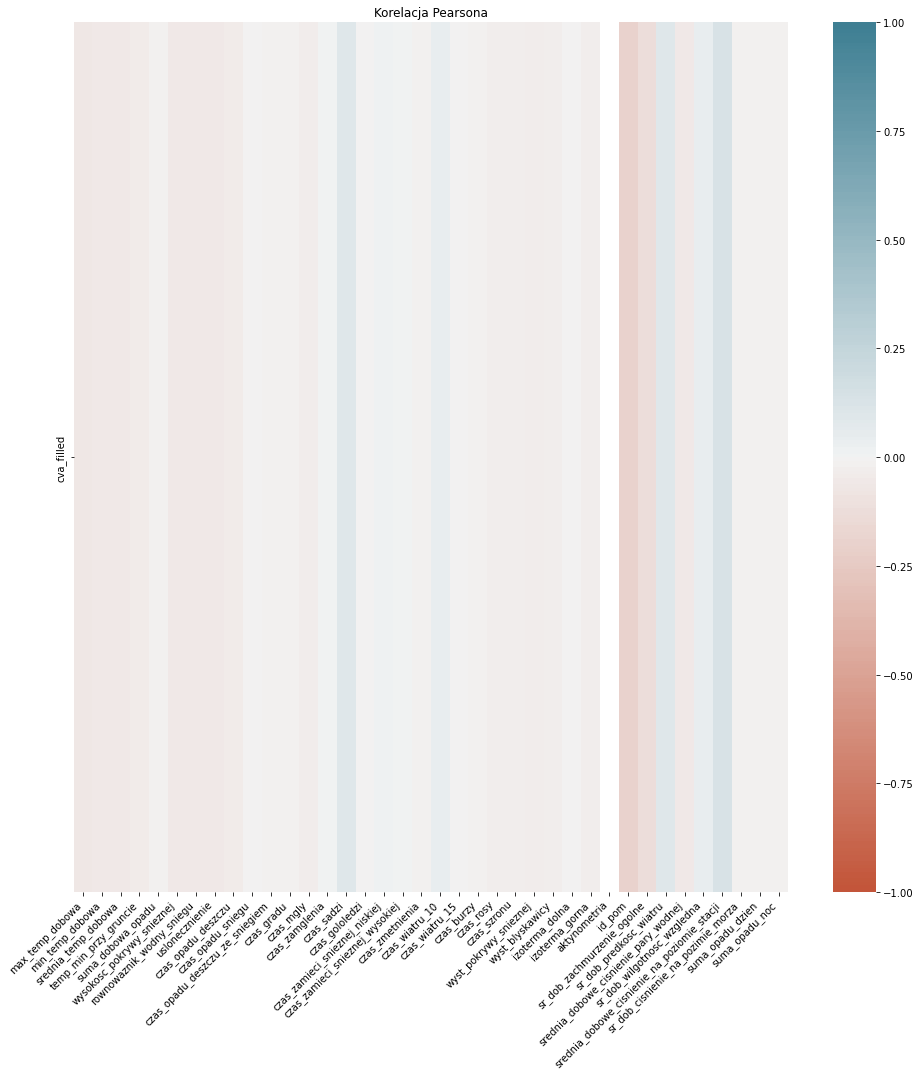

In [92]:
plt.figure(figsize=(16, 16))
corr = d1.corr().iloc[4:5, -38:]
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title("Korelacja Pearsona")
plt.show()

In [51]:
d2

,adm_date,index,dgn_group,teryt_code,cva_count,cva_weekly,week,year,cva_filled,cva_filled_weekly,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,95,2,0262011_1,5,17,1,2018,5.0,17.0,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0
1,2018-01-02,591,2,0261011_1,<5,<5,1,2018,1.0,4.0,...,65096,7.3,None,3.8,6.1,79.0,966.1,1008.0,0.1,0.0
2,2018-01-03,1228,2,0262011_1,<5,17,1,2018,2.0,17.0,...,50487,0.0,8,6.9,6.6,80.8,981.9,997.1,4.3,0.0
3,2018-01-04,1848,2,0264029_1,<5,<5,1,2018,1.0,3.0,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
4,2018-01-05,2512,2,0262011_1,<5,17,1,2018,2.0,17.0,...,50489,0.0,8,5.3,7.6,70.8,983.5,998.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2019-12-24,0,3,0,0,1,0,0,0.0,6.0,...,54129,7.3,None,3.0,7.8,86.8,996.5,1011.4,0.0,0.9
723,2019-12-25,404601,2,0262011_1,<5,6,51,2019,2.0,6.0,...,51208,0.0,8,3.9,8.1,92.0,996.7,1012.1,0.2,1.2
724,2019-12-26,404864,2,0262011_1,<5,6,51,2019,1.0,6.0,...,51209,0.0,8,4.0,7.6,90.1,1006.7,1022.3,0.6,2.6
725,2019-12-27,405115,2,0264049_2,<5,<5,51,2019,1.0,1.0,...,54132,7.4,None,2.5,6.7,89.8,1011.0,1026.2,0.0,0.1


In [52]:
d3

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,452,3,0262011_1,<5,1,2018,1,1.0,441,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0
1,2018-01-02,0,3,0,0,1,0,0,8.0,553,...,68018,7.0,None,4.0,6.5,88.3,965.1,1008.9,0.5,0.0
2,2018-01-03,1771,3,0208021_1,<5,1,2018,1,1.0,553,...,68019,7.3,None,8.6,6.2,88.0,956.7,1000.1,9.1,0.8
3,2018-01-04,0,3,0,0,1,0,0,16.0,568,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
4,2018-01-05,0,3,0,0,1,0,0,16.0,568,...,53411,6.6,None,4.9,7.8,75.1,984.6,999.2,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2019-12-09,0,3,0,0,1,0,0,14.0,555,...,54114,7.3,None,4.1,8.0,76.4,988.7,1003.3,0.0,0.0
708,2019-12-10,397969,3,0261011_1,<5,49,2019,1,1.0,253,...,65803,4.1,None,3.9,5.4,80.0,978.4,1021.2,0.0,0.0
709,2019-12-11,0,3,0,0,1,0,0,10.0,441,...,51194,0.0,8,2.4,4.6,78.6,1000.3,1016.1,0.0,0.0
710,2019-12-12,0,3,0,0,1,0,0,14.0,555,...,54117,5.5,None,1.6,4.4,75.1,990.5,1005.7,0.0,0.0


In [53]:
d4

,adm_date,index,dgn_group,teryt_code,cva_count,cva_weekly,week,year,cva_filled,cva_filled_weekly,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-03,1781,4,0208021_1,<5,<5,1,2018,1.0,2.0,...,68019,7.3,None,8.6,6.2,88.0,956.7,1000.1,9.1,0.8
1,2018-01-04,2136,4,0264049_2,<5,<5,1,2018,1.0,1.0,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
2,2018-01-05,2899,4,0264049_1,<5,5,1,2018,3.0,5.0,...,53411,6.6,None,4.9,7.8,75.1,984.6,999.2,0.0,0.1
3,2018-01-06,3402,4,0208021_1,<5,<5,1,2018,1.0,2.0,...,68022,6.5,None,2.1,8.7,89.8,966.9,1010.1,0.0,0.0
4,2018-01-07,3847,4,0262011_1,<5,<5,1,2018,1.0,2.0,...,50491,0.0,8,3.1,7.1,90.9,1010.1,1025.8,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,2019-12-18,402245,4,0262011_1,<5,<5,50,2019,1.0,2.0,...,51201,0.0,8,2.6,8.7,73.3,1001.3,1016.5,0.0,0.0
715,2019-12-19,0,3,0,0,1,0,0,0.0,12.0,...,54124,5.1,None,3.3,8.3,93.0,1005.0,1020.0,0.0,0.0
716,2019-12-20,0,3,0,0,1,0,0,0.0,12.0,...,65813,5.1,None,5.0,8.5,71.3,960.0,1000.7,0.0,0.0
717,2019-12-21,0,3,0,0,1,0,0,0.0,14.0,...,54126,7.0,None,1.9,8.7,84.5,980.5,995.1,0.0,1.4


In [54]:
d5

,adm_date,index,dgn_group,teryt_code,cva_count,cva_weekly,week,year,cva_filled,cva_filled_weekly,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-01,215,5,0262011_1,<5,14,1,2018,2.0,14.0,...,50485,0.0,8,4.8,7.6,68.8,989.4,1004.5,0.0,0.0
1,2018-01-02,800,5,0262011_1,<5,14,1,2018,2.0,14.0,...,50486,0.0,8,5.0,6.9,81.5,991.8,1007.2,0.3,0.0
2,2018-01-03,1465,5,0264029_1,<5,12,1,2018,2.0,12.0,...,53409,6.6,None,6.0,6.6,80.6,983.5,998.3,2.1,0.0
3,2018-01-04,2088,5,0264029_1,<5,12,1,2018,2.0,12.0,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
4,2018-01-05,2710,5,0262011_1,<5,14,1,2018,2.0,14.0,...,50489,0.0,8,5.3,7.6,70.8,983.5,998.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2019-12-24,0,3,0,0,1,0,0,0.0,6.0,...,54129,7.3,None,3.0,7.8,86.8,996.5,1011.4,0.0,0.9
723,2019-12-25,404705,5,0264029_1,<5,5,51,2019,1.0,5.0,...,54130,7.6,None,2.6,8.0,92.3,996.8,1011.8,2.0,1.7
724,2019-12-26,404962,5,0264029_1,<5,5,51,2019,2.0,5.0,...,54131,7.5,None,3.4,7.6,90.9,1006.7,1021.9,0.5,3.4
725,2019-12-27,405275,5,0262011_1,<5,<5,51,2019,1.0,2.0,...,51210,0.0,8,3.4,6.9,91.6,1011.1,1026.9,0.0,0.0


In [55]:
d6

,adm_date,index,dgn_group,teryt_code,cva_count,week,year,cva_filled,cva_filled_weekly,index,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-03,1777,6,0264049_3,<5,1,2018,1,1.0,555,...,53409,6.6,None,6.0,6.6,80.6,983.5,998.3,2.1,0.0
1,2018-01-04,0,3,0,0,1,0,0,16.0,568,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
2,2018-01-05,0,3,0,0,1,0,0,16.0,568,...,53411,6.6,None,4.9,7.8,75.1,984.6,999.2,0.0,0.1
3,2018-01-06,0,3,0,0,1,0,0,12.0,555,...,53412,7.4,None,1.3,8.8,84.6,994.4,1009.2,0.0,0.0
4,2018-01-07,0,3,0,0,1,0,0,8.0,553,...,68023,8.0,None,2.4,7.3,96.9,980.6,1024.9,0.3,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,2019-12-24,0,3,0,0,1,0,0,6.0,568,...,54129,7.3,None,3.0,7.8,86.8,996.5,1011.4,0.0,0.9
721,2019-12-25,0,3,0,0,1,0,0,8.0,441,...,51208,0.0,8,3.9,8.1,92.0,996.7,1012.1,0.2,1.2
722,2019-12-26,0,3,0,0,1,0,0,6.0,568,...,54131,7.5,None,3.4,7.6,90.9,1006.7,1021.9,0.5,3.4
723,2019-12-27,0,3,0,0,1,0,0,6.0,568,...,54132,7.4,None,2.5,6.7,89.8,1011.0,1026.2,0.0,0.1


In [56]:
d7

,adm_date,index,dgn_group,teryt_code,cva_count,cva_weekly,week,year,cva_filled,cva_filled_weekly,...,id_pom,sr_dob_zachmurzenie_ogolne,sp_nos,sr_dob_predkosc_wiatru,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2018-01-02,901,7,0264049_2,<5,<5,1,2018,1.0,2.0,...,53408,7.0,None,3.8,6.7,84.1,992.6,1007.6,0.5,0.0
1,2018-01-03,1573,7,0261011_1,<5,<5,1,2018,1.0,1.0,...,65097,6.4,None,4.3,6.1,80.6,956.8,998.4,1.8,0.2
2,2018-01-04,0,3,0,0,1,0,0,0.0,16.0,...,53410,6.4,None,4.9,7.0,74.0,982.9,997.6,0.0,0.2
3,2018-01-05,0,3,0,0,1,0,0,0.0,16.0,...,53411,6.6,None,4.9,7.8,75.1,984.6,999.2,0.0,0.1
4,2018-01-06,0,3,0,0,1,0,0,0.0,12.0,...,53412,7.4,None,1.3,8.8,84.6,994.4,1009.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,2019-12-22,0,3,0,0,1,0,0,0.0,12.0,...,65815,6.0,None,0.8,7.2,97.1,950.9,992.3,0.0,1.0
720,2019-12-23,0,3,0,0,1,0,0,0.0,7.0,...,65816,7.9,None,3.6,7.6,92.1,960.3,1001.8,1.6,0.2
721,2019-12-24,0,3,0,0,1,0,0,0.0,6.0,...,54129,7.3,None,3.0,7.8,86.8,996.5,1011.4,0.0,0.9
722,2019-12-25,0,3,0,0,1,0,0,0.0,8.0,...,51208,0.0,8,3.9,8.1,92.0,996.7,1012.1,0.2,1.2


In [57]:
connection.close()